In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
from google.colab import drive

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/app/pdds/kaggle.json"))


In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]



In [ ]:
!kaggle datasets download -d nirmalsankalana/sugarcane-leaf-disease-dataset


100% 159M/160M [00:02<00:00, 97.7MB/s]
100% 160M/160M [00:02<00:00, 78.0MB/s]


In [ ]:
!ls

drive  sample_data  sugarcane-leaf-disease-dataset.zip


In [ ]:
with ZipFile("/content/sugarcane-leaf-disease-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("/content/sample_data/dataset"))
print(len(os.listdir("/content/sample_data/dataset/Healthy")))
print(os.listdir("/content/sample_data/dataset/Healthy")[:5])

print(len(os.listdir("/content/sample_data/dataset/Mosaic")))
print(os.listdir("/content/sample_data/dataset/Mosaic")[:5])

print(len(os.listdir("/content/sample_data/dataset/RedRot")))
print(os.listdir("/content/sample_data/dataset/RedRot")[:5])

print(len(os.listdir("/content/sample_data/dataset/Rust")))
print(os.listdir("/content/sample_data/dataset/Rust")[:5])

print(len(os.listdir("/content/sample_data/dataset/Yellow")))
print(os.listdir("/content/sample_data/dataset/Yellow")[:5])


['RedRot', 'Healthy', 'Yellow', 'Mosaic', 'Rust']
523
['healthy (102).jpeg', 'healthy (208).jpeg', 'healthy (374).jpeg', 'healthy (50).jpeg', 'healthy (379).jpeg']
462
['mosaic (420).jpeg', 'mosaic (421).jpeg', 'mosaic (282).jpeg', 'mosaic (318).jpeg', 'mosaic (391).jpeg']
518
['redrot (287).jpeg', 'redrot (491).jpeg', 'redrot (264).jpeg', 'redrot (261).jpeg', 'redrot (442).jpeg']
514
['rust (389).jpeg', 'rust (475).jpeg', 'rust (310).jpeg', 'rust (492).jpeg', 'rust (355).jpeg']
505
['yellow (267).jpeg', 'yellow (208).jpeg', 'yellow (118).jpeg', 'yellow (255).jpeg', 'yellow (306).jpeg']


In [ ]:

# Dataset Path
base_dir = '/content/sample_data/dataset'

(493, 1040, 3)


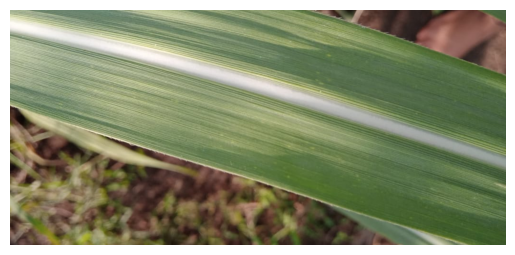

In [ ]:

image_path = '/content/sample_data/dataset/Healthy/healthy (1).jpeg'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/sample_data/dataset/Healthy/healthy (1).jpeg'
img = mpimg.imread(image_path)

print(img)


[[[157 168 138]
  [155 166 136]
  [152 163 133]
  ...
  [ 69  94  64]
  [ 69  94  64]
  [ 69  94  64]]

 [[177 188 158]
  [176 187 157]
  [173 184 154]
  ...
  [ 70  95  65]
  [ 69  94  64]
  [ 69  94  64]]

 [[186 199 169]
  [185 198 168]
  [183 196 166]
  ...
  [ 70  95  65]
  [ 70  95  65]
  [ 70  95  65]]

 ...

 [[ 57  41  42]
  [ 58  42  43]
  [ 58  42  43]
  ...
  [ 61  88  45]
  [ 62  89  46]
  [ 62  89  46]]

 [[ 52  36  37]
  [ 52  36  37]
  [ 52  36  37]
  ...
  [ 62  89  46]
  [ 63  90  47]
  [ 64  91  48]]

 [[ 48  34  34]
  [ 48  34  34]
  [ 47  33  33]
  ...
  [ 61  88  47]
  [ 63  90  49]
  [ 63  90  49]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)



Found 2019 images belonging to 5 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 502 images belonging to 5 classes.


In [ ]:

# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))



In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
63/63 [==============================] - 244s 4s/step - loss: 2.9361 - accuracy: 0.4132 - val_loss: 1.2782 - val_accuracy: 0.4792
Epoch 2/10
63/63 [==============================] - 220s 3s/step - loss: 0.8455 - accuracy: 0.6789 - val_loss: 1.2082 - val_accuracy: 0.5417
Epoch 3/10
63/63 [==============================] - 226s 4s/step - loss: 0.4857 - accuracy: 0.8329 - val_loss: 1.4124 - val_accuracy: 0.5604
Epoch 4/10
63/63 [==============================] - 221s 4s/step - loss: 0.3027 - accuracy: 0.9029 - val_loss: 1.6300 - val_accuracy: 0.5458
Epoch 5/10
63/63 [==============================] - 233s 4s/step - loss: 0.1047 - accuracy: 0.9723 - val_loss: 1.9866 - val_accuracy: 0.5458
Epoch 6/10
63/63 [==============================] - 222s 4s/step - loss: 0.0576 - accuracy: 0.9864 - val_loss: 2.1851 - val_accuracy: 0.5437
Epoch 7/10
63/63 [==============================] - 232s 4s/step - loss: 0.0693 - accuracy: 0.9824 - val_loss: 2.2373 - val_accuracy: 0.5500
Epoch 8/10
63

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
15/15 [==============================] - 15s 977ms/step - loss: 3.0110 - accuracy: 0.5396
Validation Accuracy: 53.96%


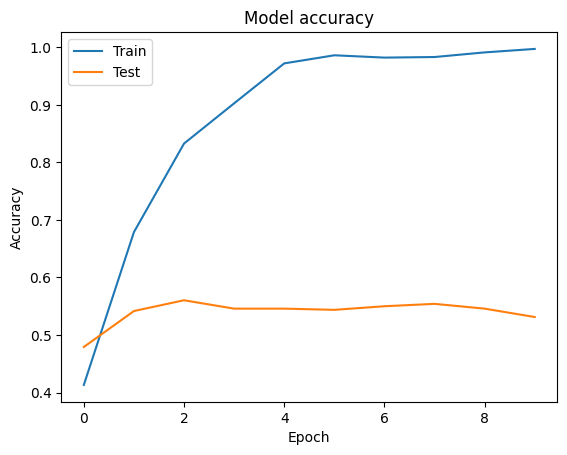

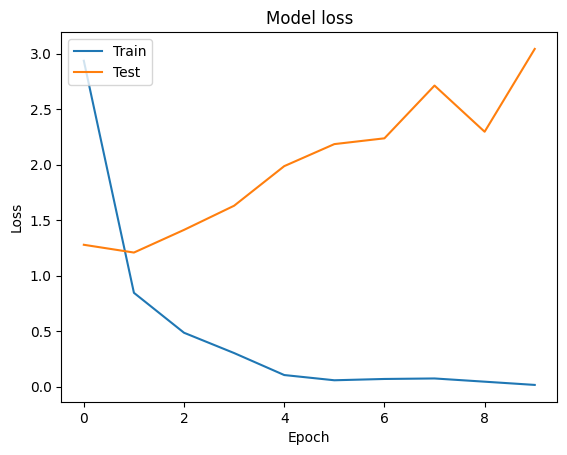

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Healthy', 1: 'Mosaic', 2: 'RedRot', 3: 'Rust', 4: 'Yellow'}

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
#example
image_path = '/content/sample_data/dataset/Healthy/healthy (101).jpeg'
#image_path = '/content/sample_data/dataset/Yellow/yellow (10).jpeg'
#image_path = '/content/sample_data/dataset/Rust/rust (102).jpeg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)


1/1 [==============================] - 0s 63ms/step
Predicted Class Name: Healthy


In [ ]:
model.save('/content/drive/MyDrive/app/pdds.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
